In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
df2 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred.xlsx')
R_g = df['u_gold']
R_b = df['u_bitcoin']
sigma_g = df['sigma_gold']
sigma_b = df['sigma_bitcoin']
pred_g = df2['gold_pred']
pred_b = df2['bitcoin_pred']
df3 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred_volatility.xlsx')
R_g = df3['u_gold']
R_b = df3['u_bitcoin']

/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_33355/3198210052.py:114: RuntimeWarning: invalid value encountered in double_scalars
  g_proportion[t] = abs(g[t]) / G[t]
/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_33355/3198210052.py:115: RuntimeWarning: invalid value encountered in double_scalars
  b_proportion[t] = abs(b[t]) / B[t]


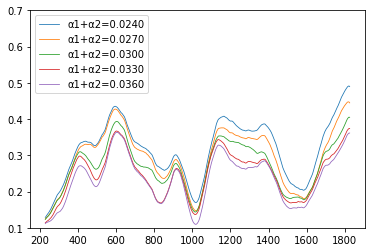

In [60]:
def cal_return(g,b,a1=0.01,a2=0.02,c0=1000):
    # g,b -> (1826,)
    n = len(g)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    # TR = 0
    for t in range(n-1):
        tran_loss =  abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])
        portfolio_value[t] = C[t] + G[t] + B[t]
        
        # print(t,C[t],G[t],B[t],portfolio_value[t],sep='\t')
        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    
    portfolio_value[n-1] = C[n-1] + G[n-1] + B[n-1]
    TR = portfolio_value[n-1] - portfolio_value[0]
    return TR,C,G,B,portfolio_value

def simulate_resolution(a1=0.01,a2=0.02):
    n = len(R_g)
    # a1 = np.random.normal(0.01, 0.002)
    # a2 = np.random.normal(0.02, 0.004)
    c = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    rr1 = 0.25
    rr2 = 0.5
    for t in range(n-1):

        r1 = rr1 + (np.random.rand()-0.5) * 0
        r2 = rr2 + (np.random.rand()-0.5) * 0

        dr= 1+(np.random.rand() - 0.8) * 0
        dr_g = 1+(np.random.rand() - 0.2) * 0
        ag = abs(R_g[t+1]) - a1 * dr_g
        ab = abs(R_b[t+1]) - a2 * dr
        if abs(R_g[t+1]) > a1 * dr_g and abs(R_b[t+1])>a2 * dr:
            if R_g[t+1] > 0 and R_b[t+1] > 0:
                g[t] = C[t]*r1*1.8*(ag/(ag+ab))
                b[t] = C[t]*r1*1.8*(ab/(ag+ab))
            elif R_g[t+1] > 0 and R_b[t+1] <= 0:
                g[t] = C[t]*r1*1.8
                b[t] = -B[t]*r2
            elif R_g[t+1] <= 0 and R_b[t+1] > 0:
                g[t] = -G[t]*r2
                b[t] = C[t]*r1*1.8
            else:
                g[t] = -G[t]*r2
                b[t] = -B[t]*r2

        elif abs(R_g[t+1]) > a1 * dr_g and abs(R_b[t+1]) <= a2 * dr:
            if R_g[t+1] < 0:
                g[t] = -G[t]*r2
            else:
                g[t] = C[t]*r1*1.5

        elif abs(R_g[t+1]) <= a1 * dr_g and abs(R_b[t+1]) > a2 * dr:
            if R_b[t+1]<0:
                b[t] = -B[t]*r2
            else:
                b[t] = C[t]*r1*1.5

            
        tran_loss = abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])

        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    return g,b,a1,a2

# aa1 = [0.0095, 0.0095, 0.01, 0.011, 0.012]
# aa2 = [0.0188, 0.019, 0.02, 0.022, 0.024]
aa1 = [0.008, 0.009, 0.01, 0.011, 0.012]
aa2 = [0.016, 0.018, 0.02, 0.022, 0.024]
for i in range(len(aa1)):
    a1 = aa1[i]
    a2 = aa2[i]

    g,b,a1,a2 = simulate_resolution(a1,a2)
    TR,C,G,B,portfolio_value = cal_return(g,b,a1,a2)
    g_acc = np.zeros(len(g))
    b_acc = np.zeros(len(b))
    g_proportion = np.zeros(len(g))
    b_proportion = np.zeros(len(g))

    for t in range(len(g)):
        if t == 0:
            g_acc[t] += abs(g[t])
            b_acc[t] += abs(b[t])
            
        else:
            g_acc[t] = g_acc[t-1] + abs(g[t])  
            b_acc[t] = b_acc[t-1] + abs(b[t])  

        g_proportion[t] = abs(g[t]) / G[t]
        b_proportion[t] = abs(b[t]) / B[t]

    # trading_volume_accumulated =np.sum(np.abs(g)) + np.sum(np.abs(b))
    t = pd.DataFrame(b_proportion).rolling(100).mean().rolling(100).mean()
    marker_type = ['*', '.', '_','o','+']
    # plt.plot(t,label=str(i),linewidth=0.8,marker=marker_type[i],markersize=0.5)

    plt.plot(t,label='α1+α2={:.4f}'.format(a1+a2),linewidth=0.8)
plt.ylim(0.1,0.7)

plt.legend(loc='upper left')
plt.show()
    # TR,C,G,B,portfolio_value = cal_return(g,b,a1,a2)

In [2]:
np.abs([-1,-2])

array([1, 2])